<a href="https://colab.research.google.com/github/Hpkarimi/googleColab/blob/main/portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
plt.style.use('fivethirtyeight')

In [ ]:
historyData = pd.read_csv('./drive/MyDrive/HistPivot991229.csv'
                          , header=0
                          , index_col=0)

In [45]:
weights = np.zeros((historyData.shape[1]))
weights[:] = 1/historyData.shape[1]

In [7]:
historyData['DataCol'] = pd.to_datetime(historyData.index, format='%Y%m%d')

In [9]:
historyData.index = historyData['DataCol']

In [11]:
historyData.index.name = 'Date'

In [ ]:
historyData.drop('DataCol', axis=1,inplace=True)

In [30]:
for c in historyData.columns.values:
  historyData[c] = historyData[c].replace({0:np.nan})

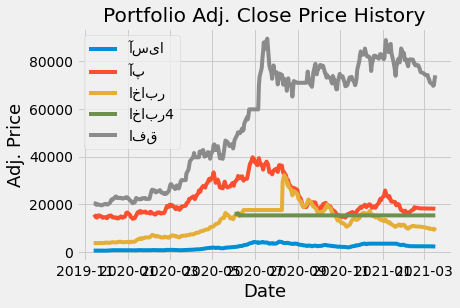

In [36]:
title = 'Portfolio Adj. Close Price History'
i = 1
col = []

for c in historyData.columns.values:
  # plt.plot(historyData[c][4600:], label=c)
  # print("\nReplacing NaNs with the value from the previous row :")
  plt.plot(historyData[c][4500:].fillna(method='pad'), label=c)
  # print("\nReplacing NaNs with the value from the next row :")
  # df['sale_amt'].fillna(method='bfill', inplace=True)
  col.append(c)
  if i == 5 :
    break
  i += 1
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price', fontsize=18)

plt.legend(col, loc='upper left')
plt.show()

In [ ]:
#show daily simple return
returns = historyData.pct_change()
returns

In [ ]:
# create and show annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

In [46]:
# calculate the portfolio variance
weights = np.zeros((historyData.shape[1]))
weights[:] = 1/historyData.shape[1]
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.017084319786325835

In [47]:
# calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.13070699976024938

In [48]:
# calculate the annual portfolio return
portfolioSimpleReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleReturn

0.3550164384674836

In [49]:
# show the expected annual return , volatility (risk), and variance
percent_var = str( round(port_variance, 2)*100)+'%'
percent_vols = str(round(port_volatility, 2)*100)+'%'
percent_ret = str(round(portfolioSimpleReturn, 2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility / risk: '+percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 36.0%
Annual volatility (risk): 13.0%
Annual variance: 2.0%


In [50]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 1.3MB 15.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.11-cp37-cp37m-linux_x86_64.whl size=2725434 sha256=fb43aad7ffb9b117304cd8420f93838e10c340487e04acc36995d36402081ea2
  Stored in directory: /root/.cache/pip/wheels/df/d4/eb/c74e09a39bc4ac09b3a8d2a48c1c6009f391056d8c87bf68aa
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [51]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [53]:
# Portfolio Optimization

# Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(historyData)
S = risk_models.sample_cov(historyData)

# optimize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
# cleaned_weights['آسیا']
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


OrderedDict([('آسیا', 0.0), ('آپ', 0.0), ('اخابر', 0.0), ('اخابر4', 0.0), ('افق', 0.02183), ('البرز', 0.0), ('امید', 0.0), ('امین', 0.0), ('اکالا', 0.0), ('بالبر', 0.0), ('بترانس', 0.0), ('بترانس2', 0.05716), ('برکت', 0.0), ('بسویچ', 0.0), ('بسویچ4', 0.0), ('بشهاب', 0.0), ('بفجر', 0.0), ('بموتو', 0.0), ('بنیرو', 0.0), ('بورس', 0.0), ('بوعلی', 0.0), ('بکاب', 0.0), ('بکام', 0.0), ('تاصیکو', 0.0), ('تاصیکو2', 0.0), ('تاپیکو', 0.0), ('تاپیکو2', 0.0), ('تایرا', 0.0), ('تمحرکه', 0.0), ('تملت', 0.0), ('تنوین', 0.0), ('تپمپی', 0.0), ('تکالا', 0.0), ('تکشا', 0.0), ('تکمبا', 0.0), ('تکنو', 0.0), ('تیپیکو', 0.0), ('ثاباد', 0.0), ('ثاخت', 0.0), ('ثامان', 0.0), ('ثامید', 0.0), ('ثبهساز', 0.0), ('ثشاهد', 0.0), ('ثشرق', 0.0), ('ثفارس', 0.0), ('ثمسکن', 0.0), ('ثنوسا', 0.0), ('جم', 0.0), ('جم پیلن', 0.0), ('جم پیلن2', 0.09245), ('جم2', 0.0), ('جم4', 0.0), ('حتاید', 0.0), ('حتوکا', 0.0), ('حفارس', 0.0), ('حفاری', 0.0), ('حفاری2', 0.0), ('حپترو', 0.0), ('حپترو4', 0.0), ('حکشتی', 0.0), ('حکشتی4', 0.0), ('

/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1246: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


(0.8768205903007265, 0.05664721438959323, 15.125555590569952)

In [56]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_price = get_latest_prices(historyData)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_price, total_portfolio_value = 1000000000)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'افق': 295, 'بترانس2': 18865, 'جم پیلن2': 1294, 'خمحور': 21, 'خپویش': 31, 'زپارس': 225, 'سدشت': 186, 'سنیر': 74, 'شتران4': 5125, 'شپنا2': 3140, 'فخوز2': 1073, 'فولاژ4': 361, 'نبروج': 144, 'نبورس': 860, 'نمرینو': 10, 'واعتبار2': 5296, 'وبصادر2': 477, 'وسخراج': 75460, 'وسصفا': 98991, 'وسقم': 107894, 'وسلرستا': 12045, 'وسکرمان': 44379, 'کاوه2': 1198, 'کویر': 2692}
Funds remaining: $1279160.00


In [58]:
len(allocation)

24